# Insurance Claim Fraud Detection


### Problem statement
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 
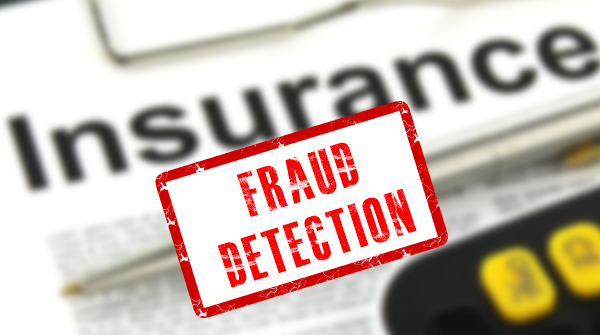


### Step 1: Importing required Libraries


In [143]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
"""importing required libraries
Pandas is a useful library in data handling. 
Numpy library used for working with arrays. 
Seaborn/Matplotlib are used for data visualisation purpose. 
Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation. 
"""
#importing required libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from subprocess import check_output


#from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Loading and Understanding the Data¶

In [145]:
df = pd.read_csv("Insurance Claim.csv")
pd.set_option("display.max_columns",None)
df.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
404,437,60,901083,19-01-1998,OH,500/1000,1000,1269.64,0,602942,FEMALE,College,armed-forces,cross-fit,unmarried,48800,0,14-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Other,SC,Riverwood,8954 Apache Lane,10,1,NO,1,3,NO,84480,7680,15360,61440,Chevrolet,Silverado,2012,Y,NaN
670,209,36,730973,11-01-2010,IN,100/300,2000,1223.39,0,452218,FEMALE,MD,craft-repair,camping,wife,0,0,12-01-2015,Multi-vehicle Collision,Rear Collision,Total Loss,Ambulance,PA,Hillsdale,2711 Britain Ave,17,3,?,1,3,?,65440,8180,8180,49080,Jeep,Wrangler,2014,N,NaN
561,272,41,337158,08-04-1991,OH,250/500,2000,945.73,5000000,435663,MALE,MD,protective-serv,chess,wife,38600,-42800,04-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NY,Arlington,4981 Flute Hwy,23,1,NO,0,0,NO,84100,16820,8410,58870,Ford,Escape,2009,Y,NaN
734,246,43,805806,16-01-2013,IN,250/500,1000,1267.40,6000000,454139,MALE,JD,adm-clerical,basketball,husband,0,0,09-02-2015,Single Vehicle Collision,Side Collision,Minor Damage,Fire,NY,Hillsdale,3771 4th St,0,1,NO,2,1,?,50700,5070,5070,40560,Accura,RSX,2006,N,NaN
790,225,39,607259,08-04-1996,OH,250/500,500,1390.72,0,448949,MALE,Masters,tech-support,paintball,other-relative,83900,-52100,20-02-2015,Parked Car,?,Trivial Damage,None,SC,Northbrook,7928 Maple Ridge,6,1,YES,2,1,YES,5830,1060,530,4240,Nissan,Pathfinder,2011,N,NaN


In [146]:
df.shape

(1000, 40)

Observation: Given dataset contains 40 columns and 1000 rows.

In [147]:
len(df.columns)

40

### Attribute Information:

Independent Variables
months_as_customer: This column shows that Number of months of patronage
    
age: This column shows that the length of time a customer has lived or a thing has existed

policy_number: This column refers a unique id given to the customer, to track the subscription status and other details of customer

policy_bind_date: This column shows that date which document that is given to customer after we accept your proposal for insurance

policy_state: This column shows that identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

policy_csl: is basically Combined Single Limit

policy_deductable: This column shows that the amount of money that a customer is responsible for paying toward an insured loss

policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

insured_zip: It is the zip code where the insurance was made

insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of 
their reproductive functions

insured_education_level: This refers to the Level of education of the customer

insured_occupation: This refers Occupation of the customer

insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together 
but not married); or. in a civil partnership

capital-gains: This refers to profit accrued due to insurance premium

capital-loss: This refers to the losses incurred due to insurance claims

incident_date: This refers to the date which claims where made by customers

incident_type: This refers to the type of claim/vehicle damage made by customer

collision_type: This refers to the area of damage on the vehicle

incident_severity: This refers to the extent/level of damage

authorities_contacted: This refers to the government agencies that were contacted after damage

incident_state: This refers to the state at which the accident happened

incident_city: This refers to the city at which the accident happened

1ncident_location: This refers to the location at which the accident happened

incident_hour_of_the_day: The period of the day which accident took place

number_of_vehicles_involved: This refers to number of vehicles involved the accident

property_damage: This refers to whether property was damaged or not

bodily_injuries: This refers to injuries sustained

witnesses: This refers to the number of witnesses involved

police_report_available: This refers to whether the report on damage was documented or not

total_claim_amount: This refers to the financial implications involved in claims

injury_claim: This refers to physical injuries sustained

property_claim: This refers to property damages during incident

vehicle_claim: This refers to property damages during incident

auto_make: This refers to the make of the vehicle

auto_model: This refers to the model of the vehicle

auto_year: This refers to the year which the vehicle was manufactured

_c39:This column shows that fraud_reported


In [148]:
#Get Overview of the data
def dataoverview(df,msg):
    print(f'{msg}:\n')
    print('Number of rows:',df.shape[0])
    print('\nNumber of features:',df.shape[1])
    print('\nData Features:')
    print(df.columns.tolist())
    print("\nMissing Values:",df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
dataoverview(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows: 1000

Number of features: 40

Data Features:
['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39']

Missing Values: 1000

Unique values:
months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date     

In [149]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [150]:
df['_c39'].nunique()

0

In [151]:
#Droping unnecessary column
df.drop("_c39", inplace= True, axis=1)

In [152]:
print("DataFrame Rows:",df.shape[0])
print("DataFrame Columns:",df.shape[1])
print("The dataframe missing values:\n", df.isnull().sum().sum())

DataFrame Rows: 1000
DataFrame Columns: 39
The dataframe missing values:
 0


Observation: No missing values present in dataset.

In [153]:
df.shape

(1000, 39)

In [154]:
i=0
for col in df:
    if df[col].dtype=="object":
        i=i+1
print("Total Categorical columns:",i)    

Total Categorical columns: 21


In [155]:
df.replace("?",np.nan,inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [157]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


### Step 3: Data Preprocessing 

In [158]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<AxesSubplot:>

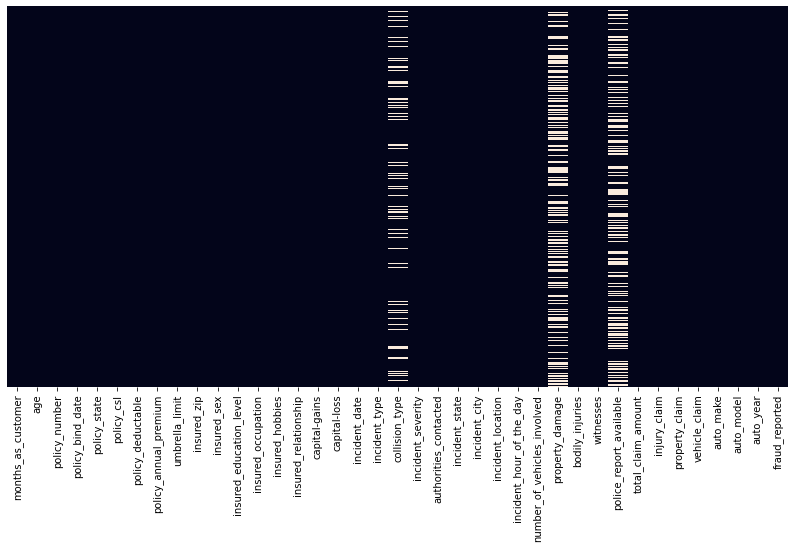

In [159]:
#Checking for null values
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [160]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [161]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [162]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [163]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [164]:
df.isnull().sum().sum()

0

### Step 4: Data Visualization(EDA)

<AxesSubplot:>

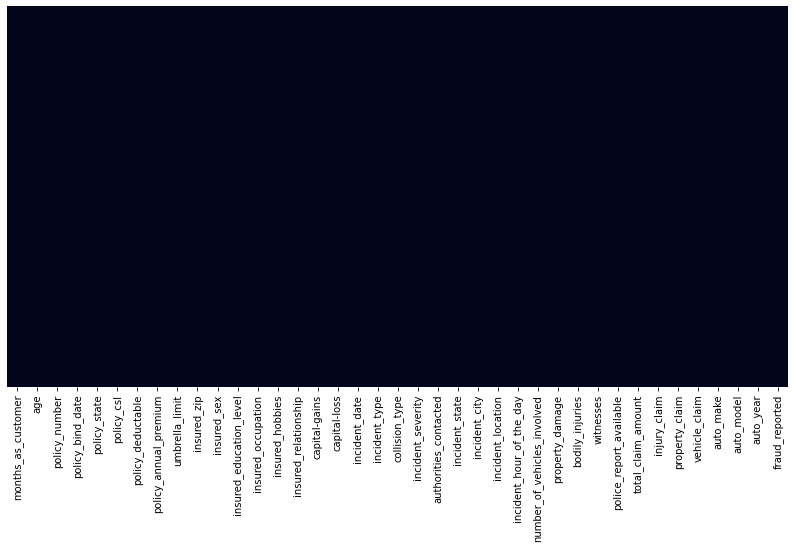

In [165]:
#Checking for null values
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Observation: All null values removed from dataset by replacing nan values with mode of the respective parameters.

<AxesSubplot:>

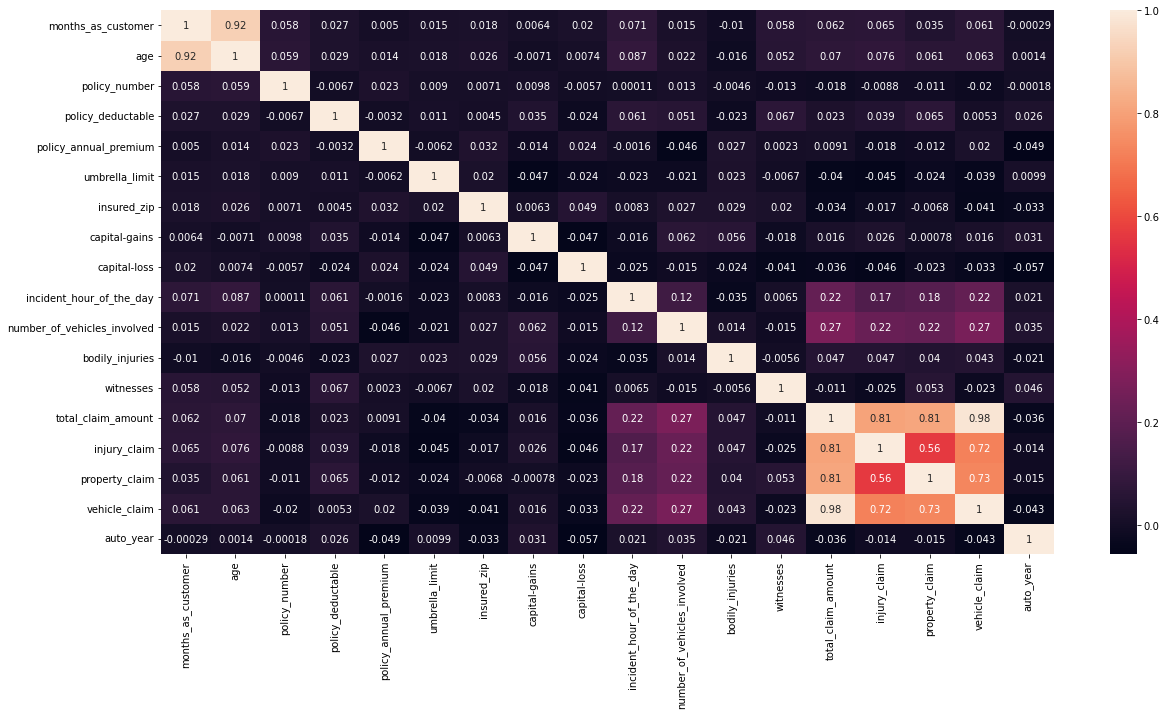

In [166]:
#Checking for null values
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)

In [167]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [168]:
#columns which are not necessary for prdiction are dropped

columns_to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
df.drop(columns_to_drop,inplace=True,axis=1)

In [169]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


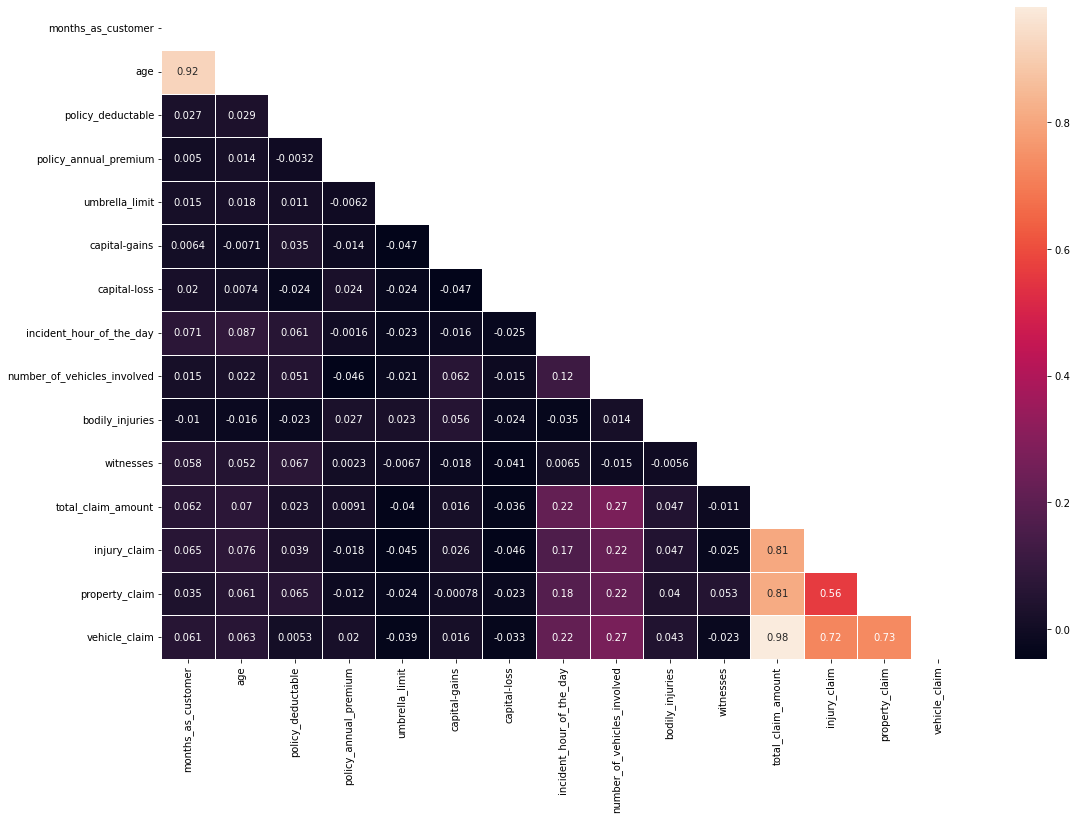

In [170]:
#checking for multicolinarity
plt.figure(figsize=(18,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data = corr, mask = mask, annot= True,fmt='.2g',linewidth=1 )
plt.show()

Observation: From the above plot, we can see that there is high correlation between age and month_as_customer. Drop the column "Age".
    Also there is high correlation between 'total_claim_amount', 'injury_claim', 'property_claim', 'vehical_claim as total'as  'total_claim_amount' is sum of all other 'injury_claim', 'property_claim', 'vehical_claim as total' so, i will drop 'total_claim _amount' column

In [171]:
df.drop(columns=["age","total_claim_amount"],inplace= True, axis=1)

In [172]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550,N


In [173]:
df.shape

(1000, 25)

In [174]:
#Separating the feature and target columns

X = df.drop("fraud_reported", axis = 1)
y = df['fraud_reported']

In [175]:
X

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,6510,13020,52080
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,780,780,3510
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,7700,3850,23100
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,6340,6340,50720
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,20,1,YES,0,1,NO,17440,8720,61040
996,285,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,23,1,YES,2,3,NO,18080,18080,72320
997,130,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,4,3,NO,2,3,YES,7500,7500,52500
998,458,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,2,1,NO,0,1,YES,5220,5220,36540


In [176]:
y

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

### Step 5: Feature Engineering (Encoding Categorical columns )

In [177]:
#encoding categorical values 
#extracting categorical columns
cat_df = X.select_dtypes(include=['object'])

In [178]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [179]:
for col in cat_df.columns:
    print(f"{col}:\n{cat_df[col].unique()}\n")

policy_csl:
['250/500' '100/300' '500/1000']

insured_sex:
['MALE' 'FEMALE']

insured_education_level:
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation:
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship:
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type:
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type:
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity:
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted:
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage:
['YES' 'NO']

police_report_available:
['YES' 'NO']



In [180]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [181]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


In [182]:
#extracing numerical columns 
num_df = X.select_dtypes(include=['int64'])

In [183]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [184]:
#combining the numerical and categorical dataframes to et final dataset
X = pd.concat([num_df,cat_df],axis=1)

In [185]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0


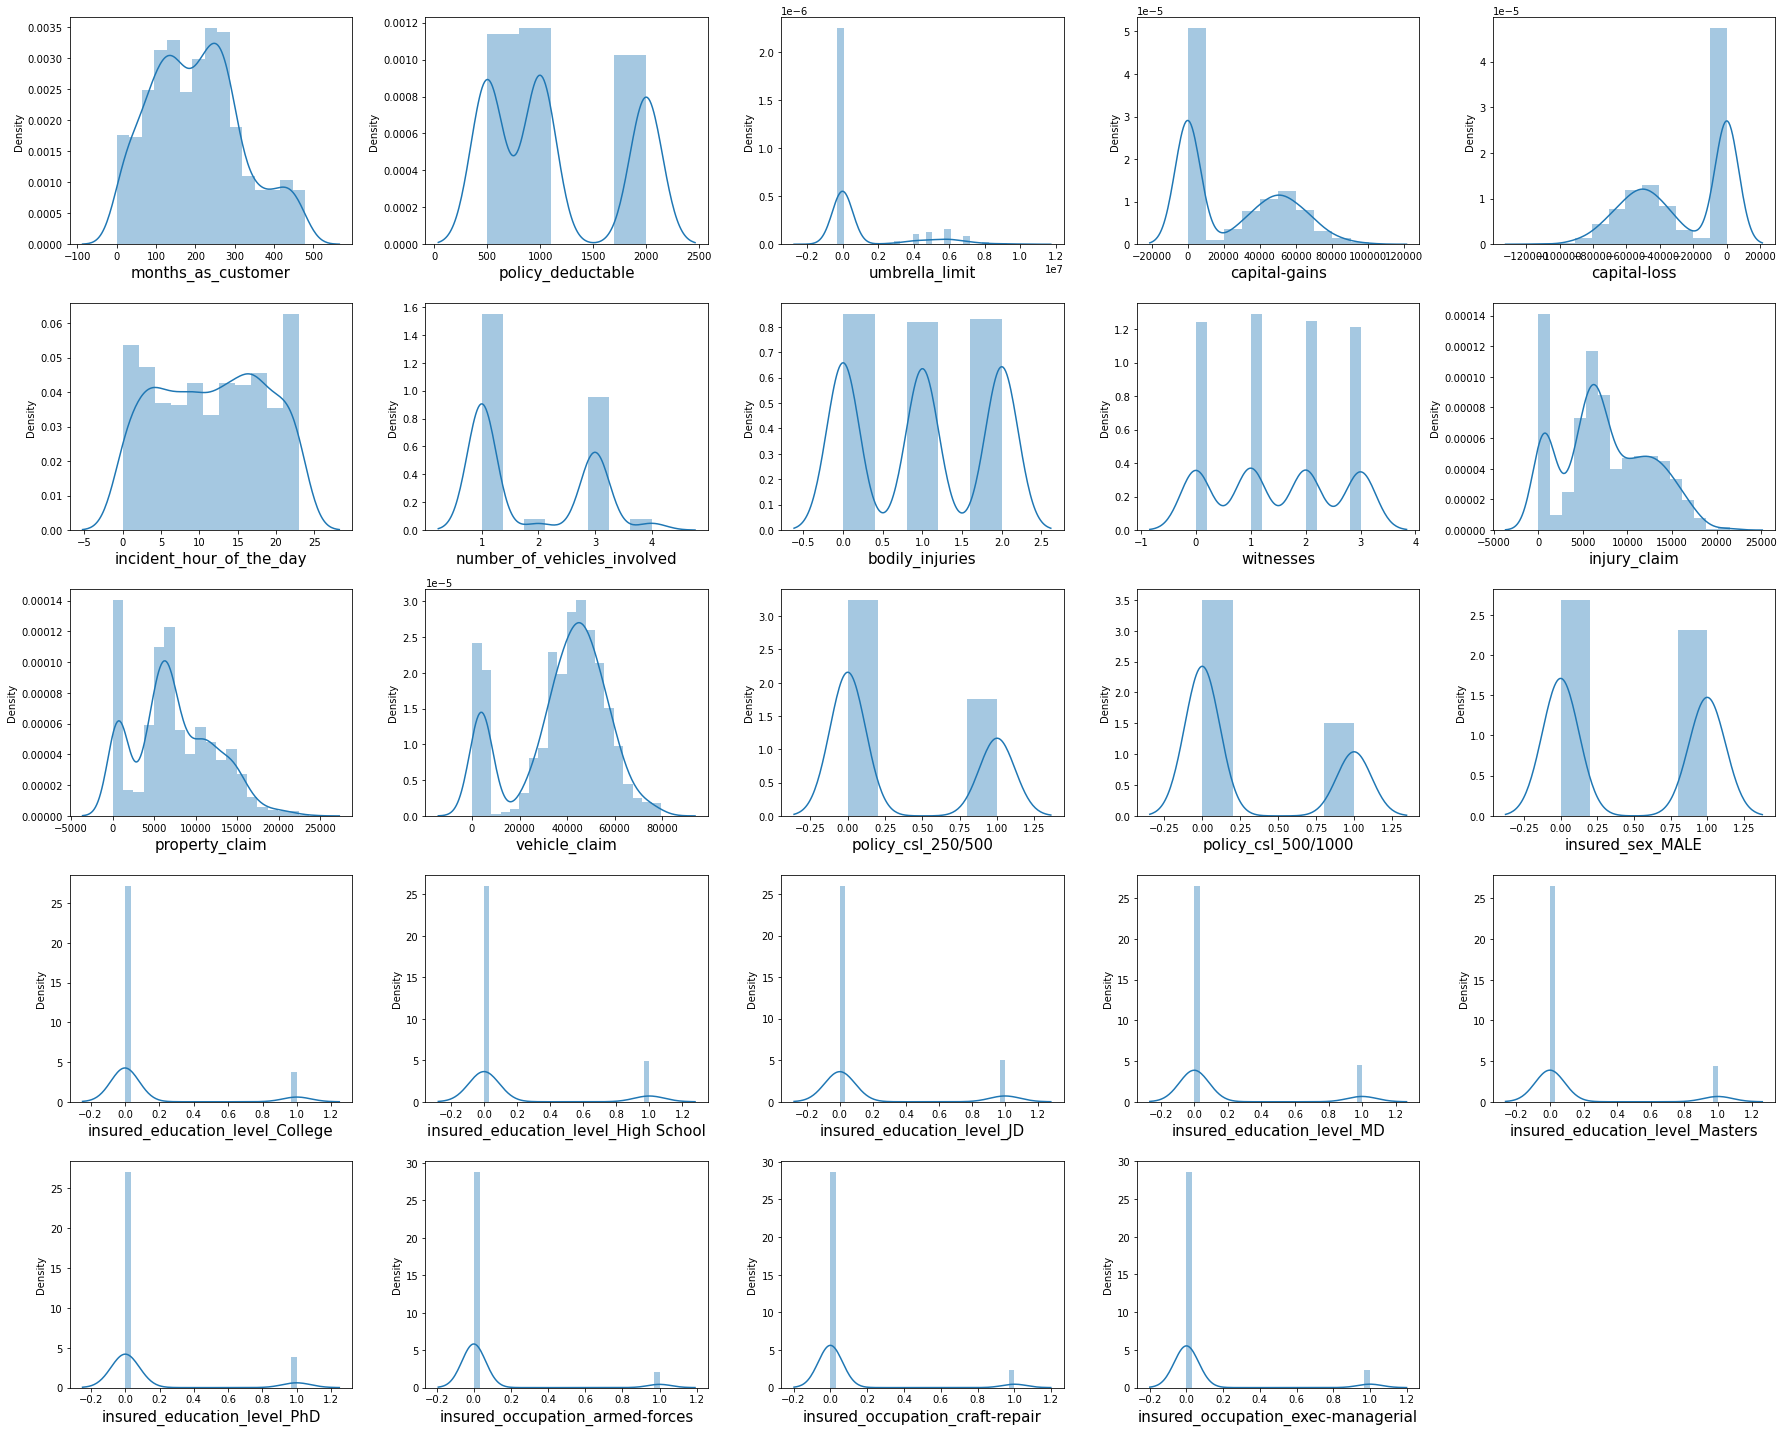

In [186]:
plt.figure(figsize=(25, 20))
plotnumber = 1
for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotnumber += 1
plt.tight_layout()
plt.show()

Observation: from above data is good, Next check for outliers.

### Outliers Detection

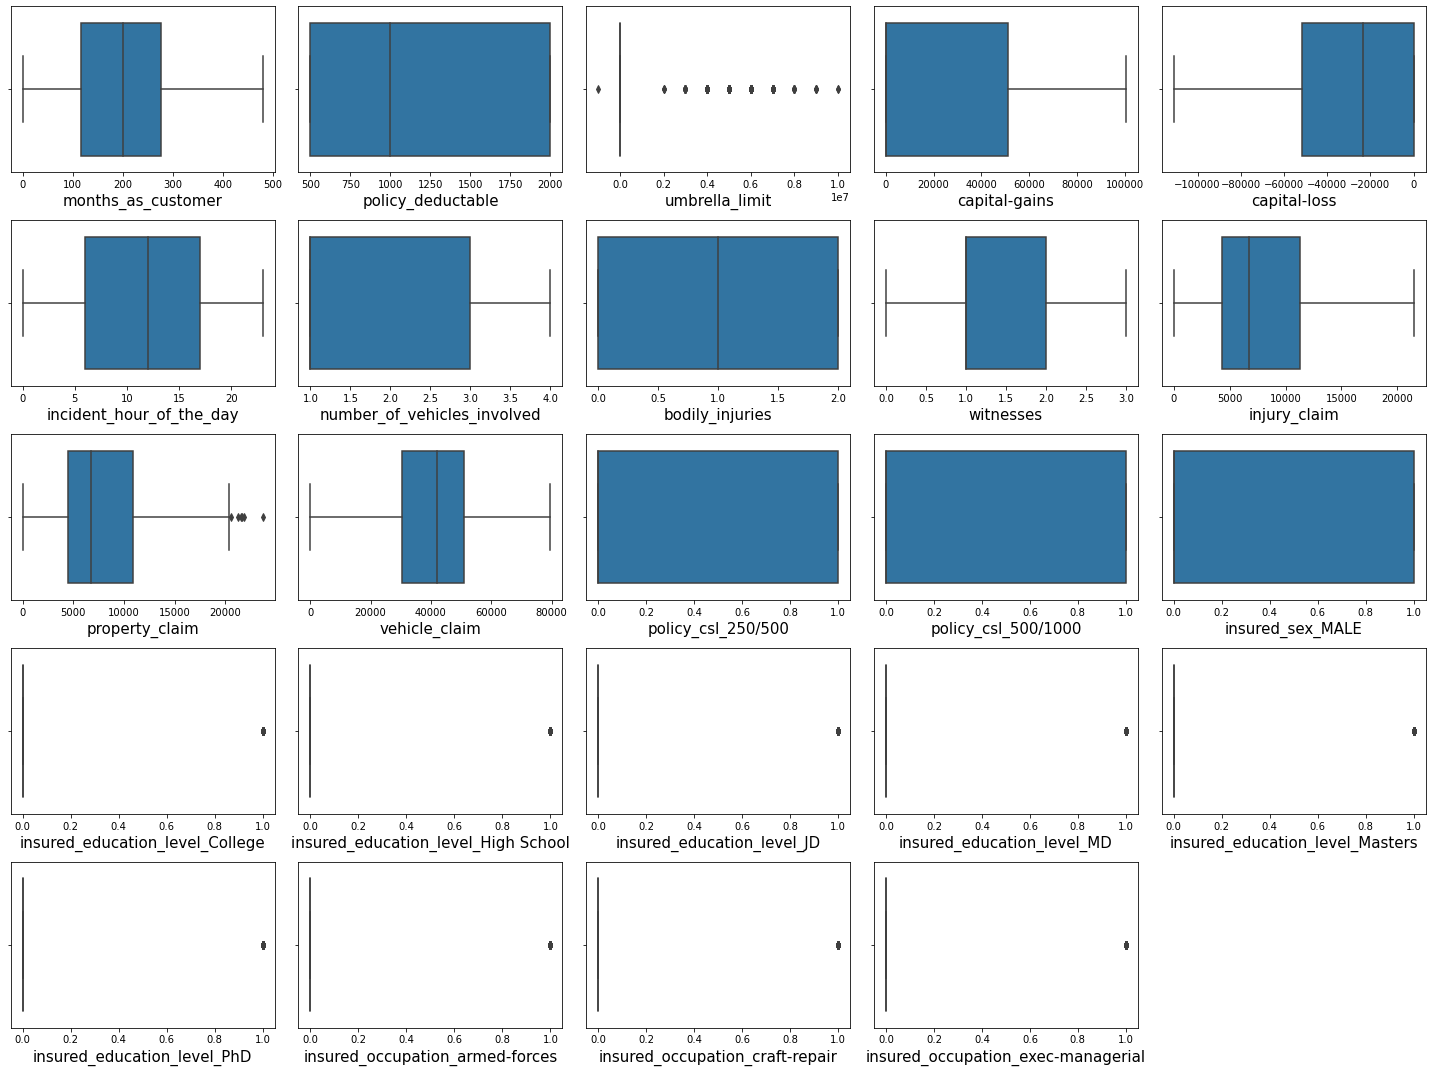

In [187]:
plt.figure(figsize = (20,15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    plotnumber += 1
plt.tight_layout()
plt.show()

Observation:Outliers are present in some columns need to scale numerical columns later.

In [188]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [189]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
670,209,2000,0,0,0,17,3,1,3,8180,8180,49080,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,137,1000,0,0,-77000,0,3,0,0,21450,7150,50050,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
477,380,1000,0,66000,0,10,1,0,1,7270,7270,43620,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1
158,45,1000,0,29000,0,17,3,2,0,13040,13040,52160,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
508,83,1000,0,0,0,0,3,0,1,6160,12320,43120,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [190]:
X_train.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insu

In [191]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [192]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim']]

In [193]:
# Scaling the nunmeric values in the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [194]:
scaled_num_df = pd.DataFrame(data=scaled_data, columns = num_df.columns, index=X_train.index)
scaled_num_df

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
670,0.036654,1.424095,-0.486872,-0.886851,0.950224,0.725835,1.177596,-0.003502,1.404749,0.174451,0.198270,0.628906
6,-0.592125,-0.231829,-0.486872,-0.886851,-1.774871,-1.701774,1.177596,-1.229130,-1.321659,2.936233,-0.024079,0.681331
477,1.530003,-0.231829,-0.486872,1.495507,0.950224,-0.273769,-0.803936,-1.229130,-0.412856,-0.014940,0.001826,0.333815
158,-1.395564,-0.231829,-0.486872,0.159943,0.950224,0.725835,1.177596,1.222126,-1.321659,1.185925,1.247414,0.795368
508,-1.063709,-0.231829,-0.486872,-0.886851,0.950224,-1.701774,1.177596,-1.229130,-0.412856,-0.245956,1.091985,0.306792
...,...,...,...,...,...,...,...,...,...,...,...,...
337,-0.399998,-0.231829,-0.486872,-0.886851,-0.950264,0.154633,-0.803936,1.222126,-1.321659,0.097446,0.118397,0.931023
91,-1.255836,1.424095,1.240937,-0.886851,-1.258165,0.297433,-0.803936,-1.229130,1.404749,0.332624,2.292241,1.841698
80,-0.592125,1.424095,-0.486872,1.015426,-0.486644,-0.844971,1.177596,-0.003502,0.495947,0.586533,0.625699,-0.376349
703,0.569369,-0.231829,-0.486872,1.358341,0.950224,0.725835,1.177596,-0.003502,-0.412856,-0.564383,0.431413,0.478658


In [195]:
X_train.drop(columns = scaled_num_df.columns, inplace=True)

In [196]:
X_train = pd.concat([scaled_num_df,X_train], axis = 1)

In [197]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
670,0.036654,1.424095,-0.486872,-0.886851,0.950224,0.725835,1.177596,-0.003502,1.404749,0.174451,0.198270,0.628906,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
6,-0.592125,-0.231829,-0.486872,-0.886851,-1.774871,-1.701774,1.177596,-1.229130,-1.321659,2.936233,-0.024079,0.681331,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
477,1.530003,-0.231829,-0.486872,1.495507,0.950224,-0.273769,-0.803936,-1.229130,-0.412856,-0.014940,0.001826,0.333815,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1
158,-1.395564,-0.231829,-0.486872,0.159943,0.950224,0.725835,1.177596,1.222126,-1.321659,1.185925,1.247414,0.795368,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
508,-1.063709,-0.231829,-0.486872,-0.886851,0.950224,-1.701774,1.177596,-1.229130,-0.412856,-0.245956,1.091985,0.306792,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


### Step 6: Building Model

## KNN

In [198]:
knn =  KNeighborsClassifier(n_neighbors =30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [199]:
# accuracy_score, confusion_matrix, classification report
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Tranining accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_train_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Tranining accuracy of KNN is : 0.7642857142857142
Test accuracy of KNN is : 0.7642857142857142
[[218   0]
 [ 82   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.84       218
           Y       0.00      0.00      0.00        82

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.61       300



## SVC

In [200]:
svc = SVC()
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)


In [201]:
#accuracy_score, confusion_matrix and classification_report
svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8285714285714286
Test accuracy of Support Vector Classifier is : 0.7266666666666667
[[218   0]
 [ 82   0]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.84       218
           Y       0.00      0.00      0.00        82

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.61       300



## Decision Tree Classifier

In [202]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [203]:
#accuracy_score, confusion_matrix and classification_report
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is: {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is: {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is: 1.0
Test accuracy of Decision Tree is: 0.3433333333333333
[[ 57 161]
 [ 36  46]]
              precision    recall  f1-score   support

           N       0.61      0.26      0.37       218
           Y       0.22      0.56      0.32        82

    accuracy                           0.34       300
   macro avg       0.42      0.41      0.34       300
weighted avg       0.51      0.34      0.35       300



In [204]:
#hyper paameter tunning

from sklearn.model_selection import GridSearchCV

grid_params = {'criterion' : ['gini', 'entropy'],
              'max_depth': [3,5,7,10],
              'min_samples_split' : range(2, 10, 1),
              'min_samples_split' : range(2, 10, 1)}
grid_search = GridSearchCV(dtc, grid_params, n_jobs=-1, cv=5, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [205]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
0.8171428571428571


In [206]:
#best estimator
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [207]:
#accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test,y_pred)

print(f"Training accuracy of Decision Tree is :{dtc_train_acc}")
print(f"Test accuracy of Decision Tree is :{dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is :0.82
Test accuracy of Decision Tree is :0.7366666666666667
[[160  58]
 [ 21  61]]
              precision    recall  f1-score   support

           N       0.88      0.73      0.80       218
           Y       0.51      0.74      0.61        82

    accuracy                           0.74       300
   macro avg       0.70      0.74      0.70       300
weighted avg       0.78      0.74      0.75       300



## Random Forest Classifier

In [208]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features ='sqrt', min_samples_leaf = 1, min_samples_split=3, n_estimators = 140)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test) 

In [209]:
#accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_train_acc = accuracy_score(y_train,rfc.predict(X_train))  
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
    

Training accuracy of Random Forest is : 0.96
Test accuracy of Random Forest is : 0.7533333333333333
[[184  34]
 [ 40  42]]
              precision    recall  f1-score   support

           N       0.82      0.84      0.83       218
           Y       0.55      0.51      0.53        82

    accuracy                           0.75       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.75      0.75      0.75       300



## AdaBoost classifier

In [210]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 70, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm':['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada,parameters, n_jobs = -1, cv = 5,verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 70, 120, 180, 200]},
             verbose=1)

In [211]:
#best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 70}
0.8185714285714285


In [212]:
# best estimator

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

In [213]:
#accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ada_train_acc = accuracy_score(y_train,ada.predict(X_train))  
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {ada_train_acc}")
print(f"Test accuracy of Random Forest is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
    

Training accuracy of Random Forest is : 0.82
Test accuracy of Random Forest is : 0.79
[[180  38]
 [ 25  57]]
              precision    recall  f1-score   support

           N       0.88      0.83      0.85       218
           Y       0.60      0.70      0.64        82

    accuracy                           0.79       300
   macro avg       0.74      0.76      0.75       300
weighted avg       0.80      0.79      0.79       300



## Gradient Boosting Classifier

In [214]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [215]:
#accuracy_score, confusion_matrix and classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_acc = accuracy_score(y_test, gb.predict(X_test))  

print(f"Training accuracy of Random Forest is : {gb_acc}")
print(f"Test accuracy of Random Forest is : {gb_acc}\n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification_report :- \n {classification_report(y_test, gb.predict(X_test))}")
    

Training accuracy of Random Forest is : 0.36
Test accuracy of Random Forest is : 0.36

Confusion Matrix :- 
 [[ 28 190]
 [  2  80]]

Classification_report :- 
               precision    recall  f1-score   support

           N       0.93      0.13      0.23       218
           Y       0.30      0.98      0.45        82

    accuracy                           0.36       300
   macro avg       0.61      0.55      0.34       300
weighted avg       0.76      0.36      0.29       300



## Stochastic Gradient Boosting (SGB) 

In [216]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features= 0.70)
sgb.fit(X_train, y_train)

#accuracy score, confusion matix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc}\n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, sgb.predict(X_test))}\n")

Training Accuracy of Stochastic Gradient Boosting is 0.9371428571428572
Test Accuracy of Stochastic Gradient Boosting is 0.3433333333333333

Confusion Matrix :- 
[[ 22 196]
 [  1  81]]

Classification Report :- 
              precision    recall  f1-score   support

           N       0.96      0.10      0.18       218
           Y       0.29      0.99      0.45        82

    accuracy                           0.34       300
   macro avg       0.62      0.54      0.32       300
weighted avg       0.78      0.34      0.26       300




## XgBoost Classifier

In [217]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [218]:
#encoding y_train (Y, N) to (1, 0) 
y_train = pd.get_dummies(y_train, drop_first = True)

In [219]:
y_train

,Y
670,0
6,0
477,1
158,0
508,0
...,...
337,0
91,1
80,0
703,1


In [220]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [221]:
#encoding y_test
y_test = pd.get_dummies(y_test, drop_first = True)

In [222]:
# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.7566666666666667
[[167  51]
 [ 22  60]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       218
           1       0.54      0.73      0.62        82

    accuracy                           0.76       300
   macro avg       0.71      0.75      0.72       300
weighted avg       0.79      0.76      0.77       300



## catBoost Classifier

In [223]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [224]:
#install.packages("catboost")

In [225]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations = 10)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test) 

Learning rate set to 0.5
0:	learn: 0.5611527	total: 5.66ms	remaining: 50.9ms
1:	learn: 0.4365238	total: 14.4ms	remaining: 57.7ms
2:	learn: 0.4088671	total: 20ms	remaining: 46.7ms
3:	learn: 0.3763703	total: 25.3ms	remaining: 37.9ms
4:	learn: 0.3461429	total: 32.3ms	remaining: 32.3ms
5:	learn: 0.3277441	total: 38.1ms	remaining: 25.4ms
6:	learn: 0.3076373	total: 44ms	remaining: 18.8ms
7:	learn: 0.2945234	total: 49.7ms	remaining: 12.4ms
8:	learn: 0.2823746	total: 55.1ms	remaining: 6.12ms
9:	learn: 0.2592306	total: 61ms	remaining: 0us


In [226]:
#accuracy score, confusion matrix and classification report
cat_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Testing Accuracy of Cat Boost Classifier is {cat_acc}\n")

print(f"Confusion Matrix:- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report:- \n{classification_report(y_test, cat.predict(X_test))}")


Training Accuracy of Cat Boost Classifier is 0.9085714285714286
Testing Accuracy of Cat Boost Classifier is 0.71

Confusion Matrix:- 
[[163  55]
 [ 32  50]]

Classification Report:- 
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       218
           1       0.48      0.61      0.53        82

    accuracy                           0.71       300
   macro avg       0.66      0.68      0.66       300
weighted avg       0.74      0.71      0.72       300



## LGBM Classifier

In [227]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.6866666666666666 

[[144  74]
 [ 20  62]]

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       218
           1       0.46      0.76      0.57        82

    accuracy                           0.69       300
   macro avg       0.67      0.71      0.66       300
weighted avg       0.76      0.69      0.70       300



## Extra Tree Classifier

In [229]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.75 

Confusion Matrix :- 
[[189  29]
 [ 46  36]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       218
           1       0.55      0.44      0.49        82

    accuracy                           0.75       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.74      0.75      0.74       300



## Voting Classifier

In [230]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rfc),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5611527	total: 16.9ms	remaining: 152ms
1:	learn: 0.4365238	total: 34.4ms	remaining: 138ms
2:	learn: 0.4088671	total: 45.4ms	remaining: 106ms
3:	learn: 0.3763703	total: 55.4ms	remaining: 83.1ms
4:	learn: 0.3461429	total: 65.2ms	remaining: 65.2ms
5:	learn: 0.3277441	total: 75ms	remaining: 50ms
6:	learn: 0.3076373	total: 84.9ms	remaining: 36.4ms
7:	learn: 0.2945234	total: 94.9ms	remaining: 23.7ms
8:	learn: 0.2823746	total: 105ms	remaining: 11.6ms
9:	learn: 0.2592306	total: 115ms	remaining: 0us


In [231]:
# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9528571428571428
Test accuracy of Voting Classifier is : 0.7866666666666666
[[179  39]
 [ 25  57]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       218
           1       0.59      0.70      0.64        82

    accuracy                           0.79       300
   macro avg       0.74      0.76      0.74       300
weighted avg       0.80      0.79      0.79       300



### Step 7: Model Comparision

In [232]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost','Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rfc_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Ada Boost,0.790000
11,Voting Classifier,0.786667
10,XgBoost,0.756667
3,Random Forest,0.753333
8,Extra Trees,0.750000
2,Decision Tree,0.736667
0,SVC,0.726667
1,KNN,0.726667
7,Cat Boost,0.710000
9,LGBM,0.686667


In [233]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')


In [235]:
ada_test_acc

0.79

### Step 8: Pickeling Model 

In [234]:
#Saving Model
import pickle
insurance_frad_detection_model = 'insurance_frad.pickle'
pickle.dump(ada_test_acc,open(insurance_frad_detection_model,'wb'))